# Packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pydotplus 
from IPython.display import Image  

plt.style.use('ggplot')

/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Variáveis úteis

In [2]:
zscore = "z-score"
minmax = "maxmin"
original = "original"
duplicate = "duplicate"
eng_data_original = "eng_data_original"
eng_data_zscore = "eng_data_zscore"
seed = 1

# Leitura dos Dados

In [3]:
data = {}
data[original]= pd.read_csv("diabetes/diabetes.csv")


In [4]:
data[original].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Colunas de Predição

In [5]:
predictors = [str(x) for x in data["original"].columns[:-1]]
predict_class = str(data[original].columns[-1])

# Tratamento dos Dados

### Analisando distribuição das variáveis

Vamos analisar a distribuicao dos dados das pessoas com glicose alta

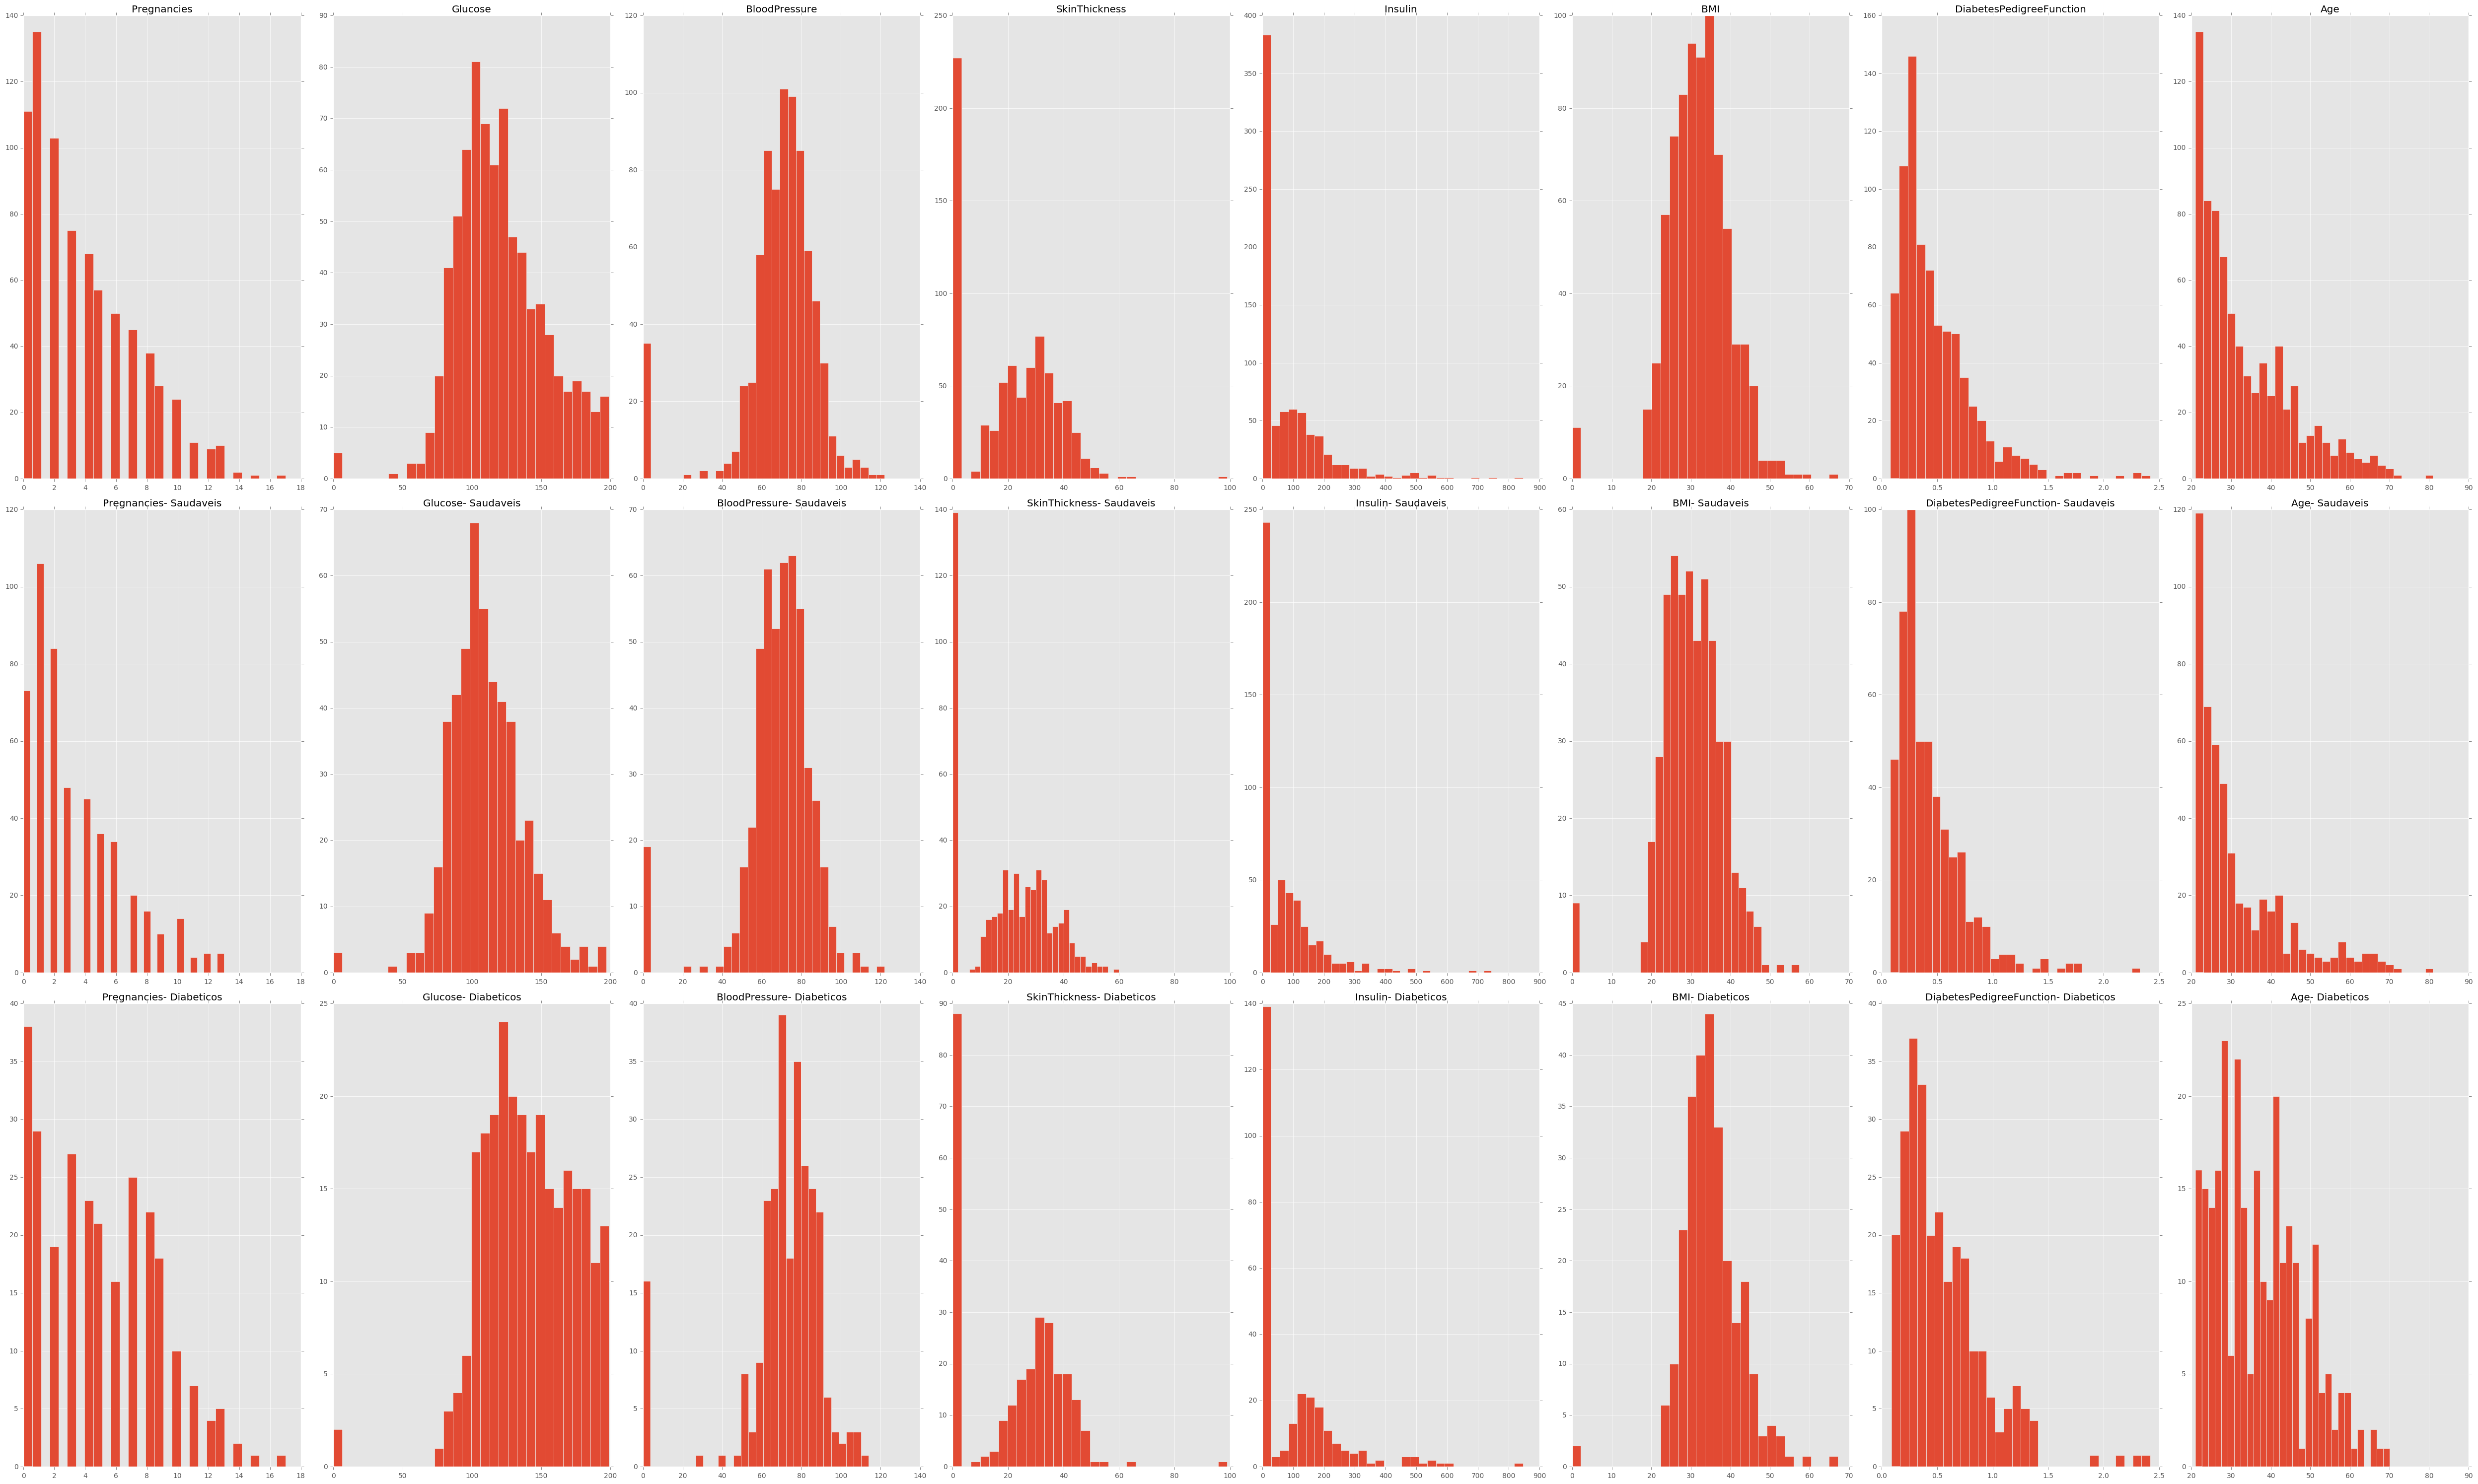

In [6]:
fig, axes = plt.subplots(3, len(predictors), figsize=(50,30))
for i in range(len(predictors)):
   
    label = predictors[i]
    axes[0, i].set_title(label)
    data[original][label].hist(ax=axes[0, i], bins=30)

    label = predictors[i]
    axes[1, i].set_title(label + "- Saudaveis")
    data[original][label].loc[data[original]["Outcome"] == 0].hist(ax=axes[1, i], bins=30)
    
    axes[1, i].set_xlim(axes[0, i].get_xlim())
    #axes[1, i].set_ylim(axes[0, i].get_ylim())
    
    label = predictors[i]
    axes[2, i].set_title(label + "- Diabeticos")
    data[original][label].loc[data[original]["Outcome"] == 1].hist(ax=axes[2, i], bins=30)
    
    axes[2, i].set_xlim(axes[0, i].get_xlim())
    #axes[2, i].set_ylim(axes[0, i].get_ylim())

       
plt.tight_layout()
       


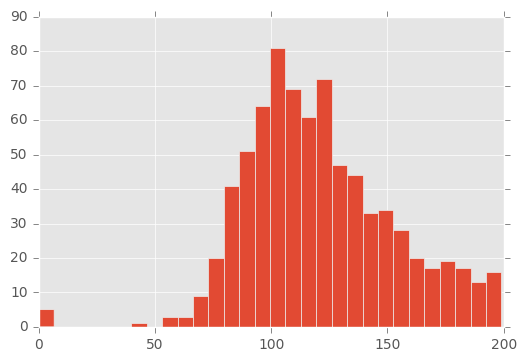

In [7]:
 data[original]["Glucose"].hist( bins=30)

In [8]:
#remover zeros pela media dos casos
for feature in ["Glucose", "BloodPressure", "BMI"]:
    data[original][feature] = data[original][feature].apply(lambda x: data[original][feature].mean() if x <=1 else x)


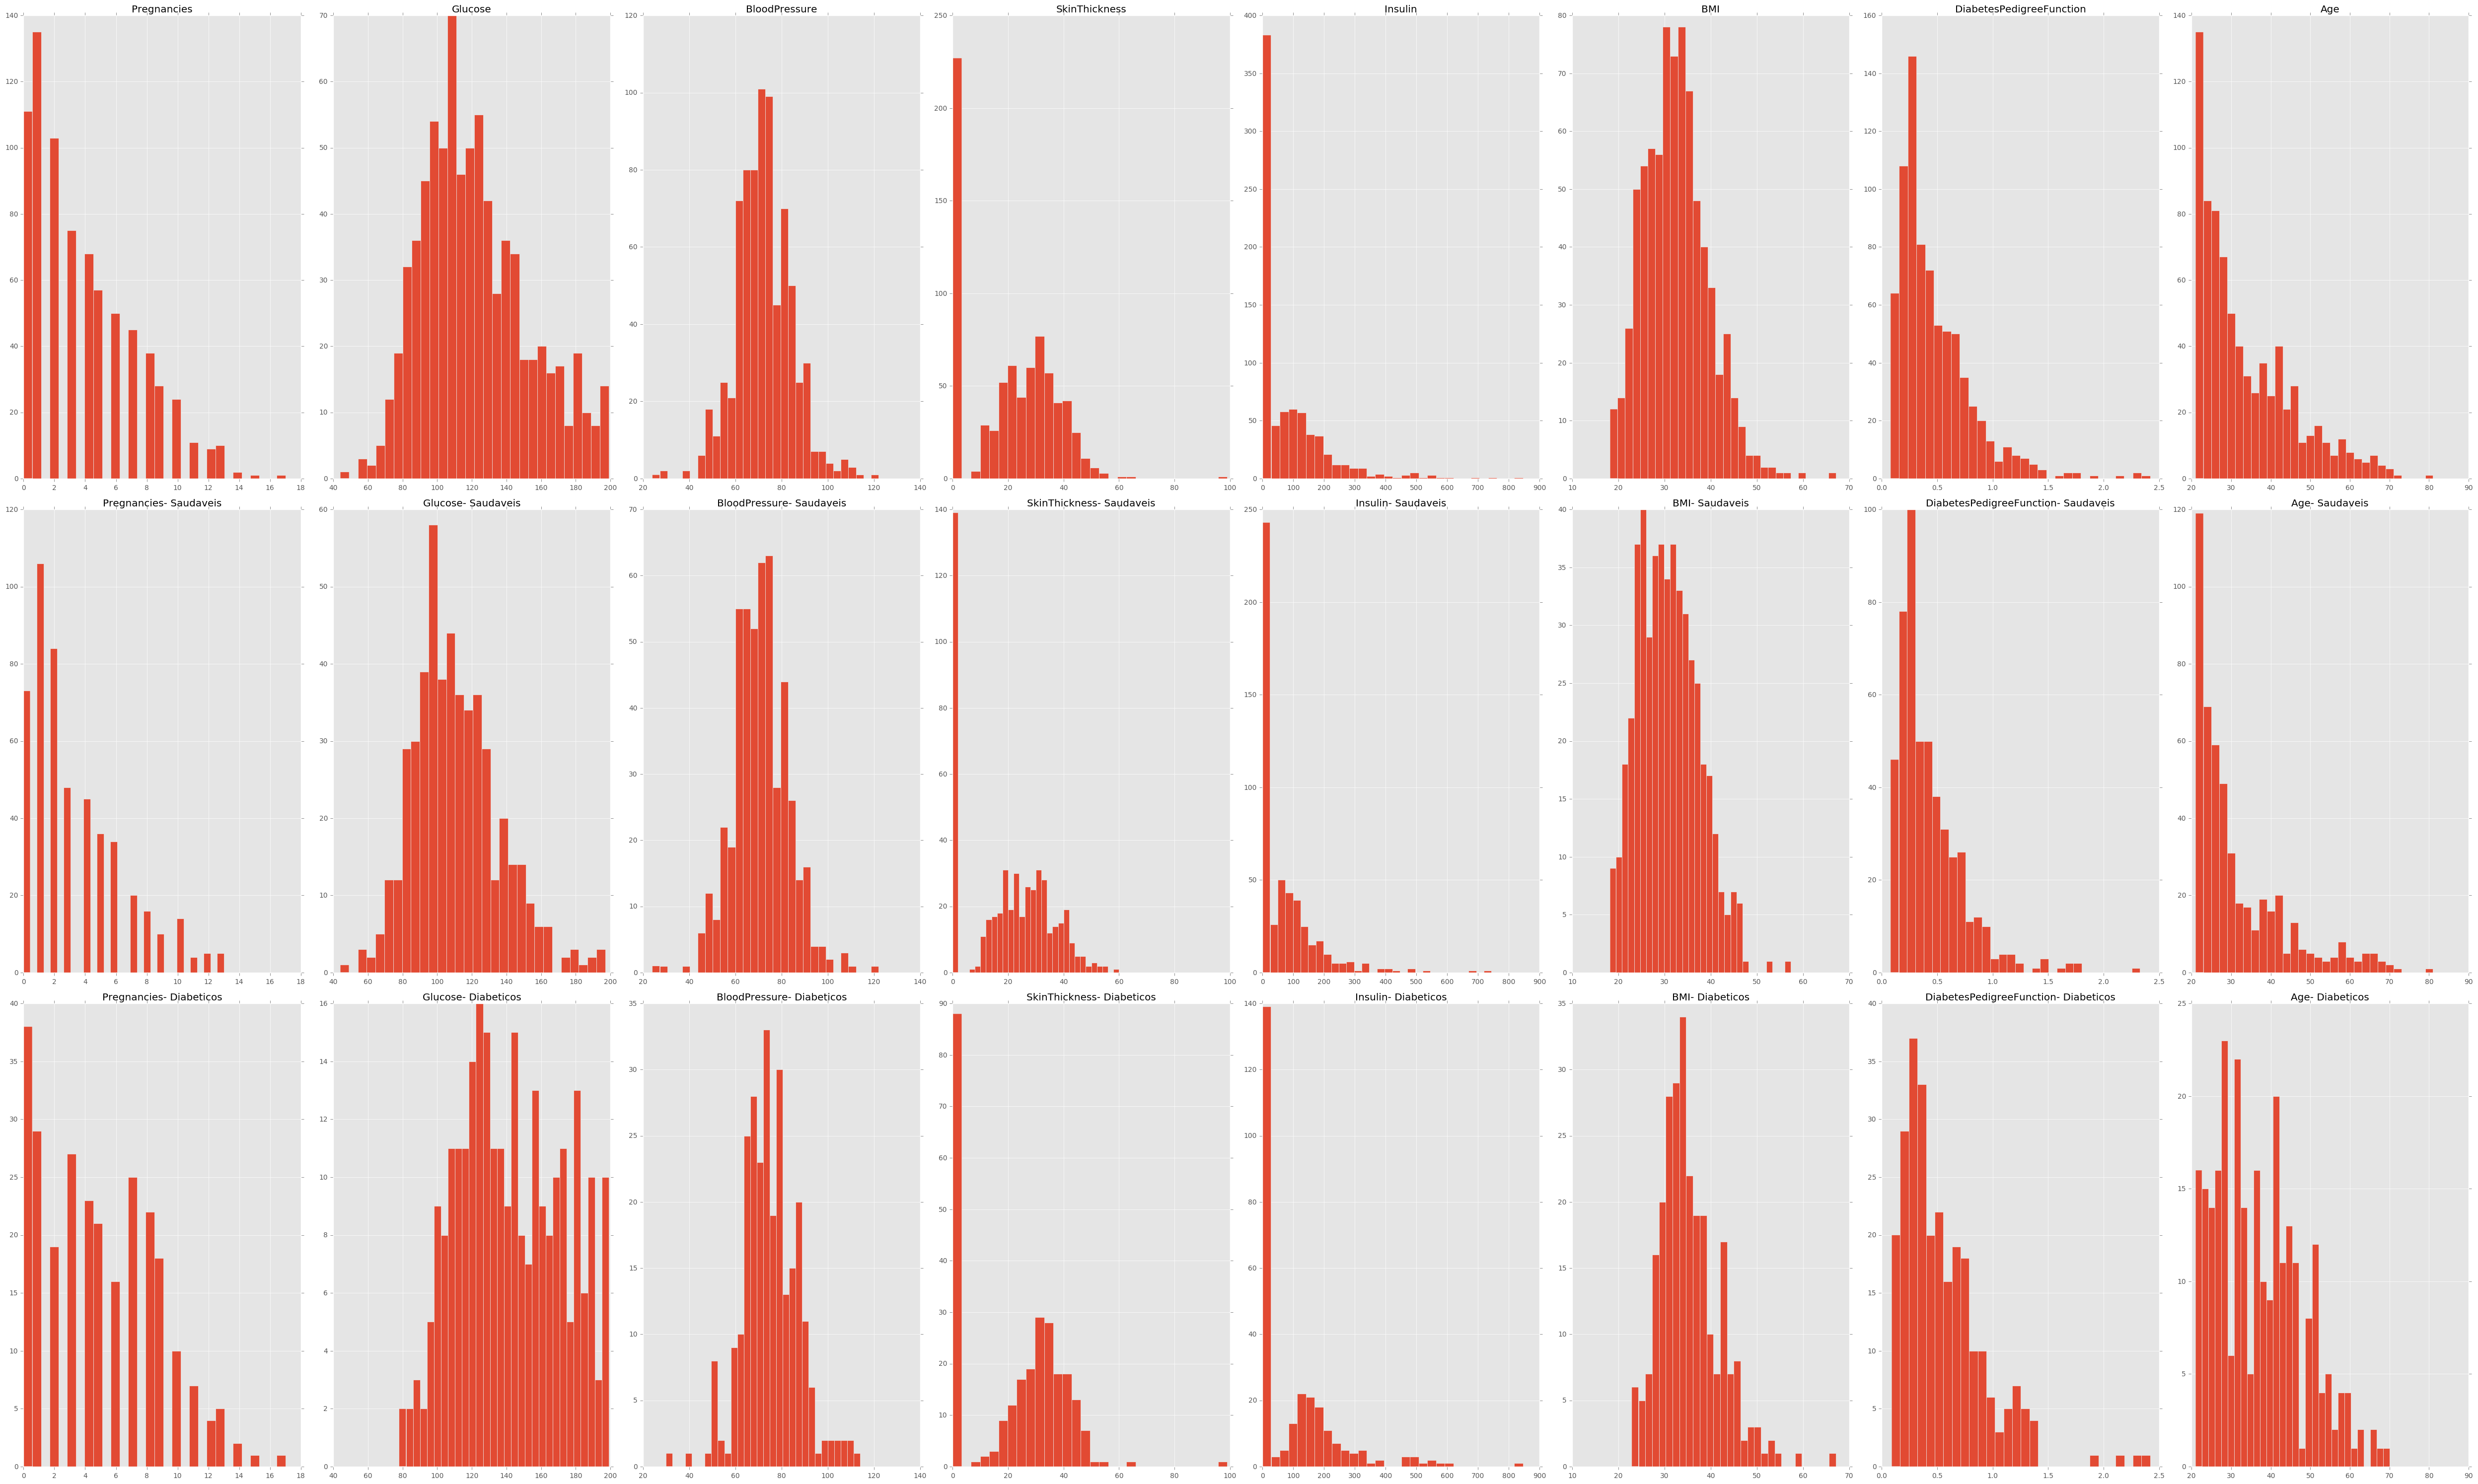

In [9]:
fig, axes = plt.subplots(3, len(predictors), figsize=(50,30))
for i in range(len(predictors)):
   
    label = predictors[i]
    axes[0, i].set_title(label)
    data[original][label].hist(ax=axes[0, i], bins=30)

    label = predictors[i]
    axes[1, i].set_title(label + "- Saudaveis")
    data[original][label].loc[data[original]["Outcome"] == 0].hist(ax=axes[1, i], bins=30)
    
    axes[1, i].set_xlim(axes[0, i].get_xlim())
    #axes[1, i].set_ylim(axes[0, i].get_ylim())
    
    label = predictors[i]
    axes[2, i].set_title(label + "- Diabeticos")
    data[original][label].loc[data[original]["Outcome"] == 1].hist(ax=axes[2, i], bins=30)
    
    axes[2, i].set_xlim(axes[0, i].get_xlim())
    #axes[2, i].set_ylim(axes[0, i].get_ylim())

       
plt.tight_layout()
       


In [10]:
data[original].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


## Corrigindo dados de Skin Thickness

541 541
0.989856233295 -3.40532163968


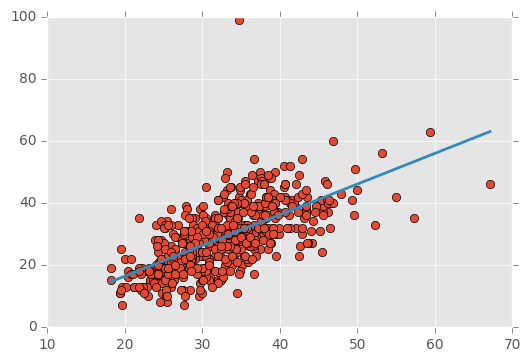

In [11]:

d = data[original].loc[data[original]["SkinThickness"] > 0]

Y = d["SkinThickness"]
X = d["BMI"]

print len(X.values), len(Y.values)

A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y.values)[0]

print m, c

plt.plot(X,Y, "o")

xsort = np.sort(X) 
xsort = [0] + xsort
plt.plot(xsort ,xsort *m+c, "-", linewidth=2.0)

d = data[original].loc[data[original]["SkinThickness"] == 0]

d = d["BMI"]*m+c


In [12]:
data[original].loc[data[original]["SkinThickness"] == 0, "SkinThickness"] = d.values

## Normalizando os Dados

In [13]:
data[zscore] = normalize_data(data[original], predictors, zscore)
data[minmax] = normalize_data(data[original], predictors, minmax)

Normalizando Pregnancies com z-score
Normalizando Glucose com z-score
Normalizando BloodPressure com z-score
Normalizando SkinThickness com z-score
Normalizando Insulin com z-score
Normalizando BMI com z-score
Normalizando DiabetesPedigreeFunction com z-score
Normalizando Age com z-score
Normalizando Pregnancies com MaxMin
Normalizando Glucose com MaxMin
Normalizando BloodPressure com MaxMin
Normalizando SkinThickness com MaxMin
Normalizando Insulin com MaxMin
Normalizando BMI com MaxMin
Normalizando DiabetesPedigreeFunction com MaxMin
Normalizando Age com MaxMin


/Users/mtsodf/OneDrive/Mestrado/DataMining/macos_dataenv/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [35]:
np.logspace(0, 3)


array([    1.        ,     1.1513954 ,     1.32571137,     1.52641797,
           1.75751062,     2.02358965,     2.32995181,     2.6826958 ,
           3.0888436 ,     3.55648031,     4.09491506,     4.71486636,
           5.42867544,     6.25055193,     7.19685673,     8.28642773,
           9.54095476,    10.98541142,    12.64855217,    14.56348478,
          16.76832937,    19.30697729,    22.22996483,    25.59547923,
          29.47051703,    33.93221772,    39.06939937,    44.98432669,
          51.79474679,    59.63623317,    68.6648845 ,    79.06043211,
          91.0298178 ,   104.81131342,   120.67926406,   138.94954944,
         159.98587196,   184.20699693,   212.09508879,   244.20530945,
         281.1768698 ,   323.74575428,   372.75937203,   429.19342601,
         494.17133613,   568.9866029 ,   655.12855686,   754.31200634,
         868.51137375,  1000.        ])

Computing regularization path ...
('This took ', datetime.timedelta(0, 0, 355691))


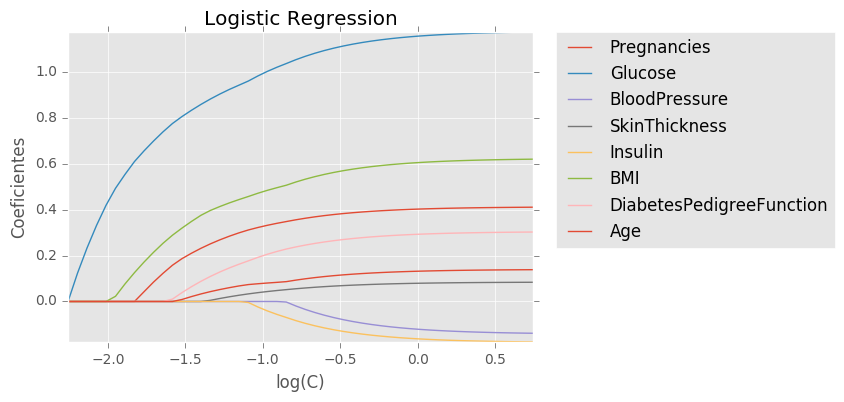

In [54]:
from sklearn.svm import l1_min_c
cs = l1_min_c(data[zscore][predictors], data[zscore][predict_class], loss='log') * np.logspace(0, 3)


print("Computing regularization path ...")
start = datetime.now()
clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(data[zscore][predictors], data[zscore][predict_class])
    coefs_.append(clf.coef_.ravel().copy())
print("This took ", datetime.now() - start)

coefs_ = np.array(coefs_)

for i in range(np.size(coefs_, axis=1)):
    plt.plot(np.log10(cs), coefs_[:,i].T, label=predictors[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coeficientes')
plt.title('Logistic Regression')
plt.axis('tight')
plt.show()

In [62]:
alg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

alg.fit(data[zscore][predictors], data[zscore][predict_class])
t = zip(alg.feature_importances_, predictors)
t.sort(reverse=True)
for i, v in t:
    print v, i
    


Glucose 0.281655809797
BMI 0.138372264008
SkinThickness 0.130620079333
Age 0.129762241873
DiabetesPedigreeFunction 0.104554212663
BloodPressure 0.0742778717772
Pregnancies 0.0712335901268
Insulin 0.069523930422
